# **QUESTION 1**
## **Implement the AlexNet architecture.Train, test and report the performance of this model on the Cats_and_Dogs_Dataset, Horse2Zebra Dataset**

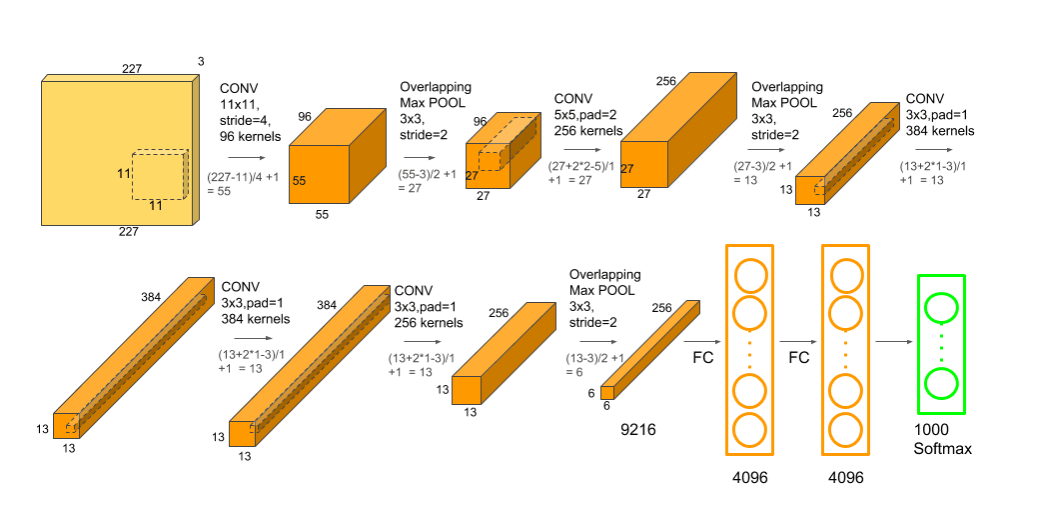

### **AlexNet Architecture on Cats_and_Dogs_Dataset**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 17:20:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   144MB/s    in 0.5s    

2022-08-23 17:20:28 (144 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [11]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
history = model.fit( train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 13s 118ms/step - loss: 2.3940 - acc: 0.5850 - val_loss: 0.7870 - val_acc: 0.4850
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 1.7285 - acc: 0.5995 - val_loss: 3.5298 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 11s 115ms/step - loss: 1.4351 - acc: 0.6155 - val_loss: 1.7878 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 12s 117ms/step - loss: 1.1302 - acc: 0.6585 - val_loss: 2.1261 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 13s 129ms/step - loss: 0.9098 - acc: 0.6705 - val_loss: 0.8134 - val_acc: 0.6050
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 0.7713 - acc: 0.7005 - val_loss: 0.6486 - val_acc: 0.6790
Epoch 7/10
100/100 [==============================] - 11s 114ms/step - loss: 0.7493 - acc: 0.7230 - val_loss: 0.6267 - val_acc: 0.6960
Epoch 8/10
100/100 [==============================] - 1

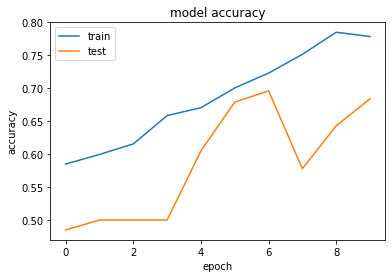

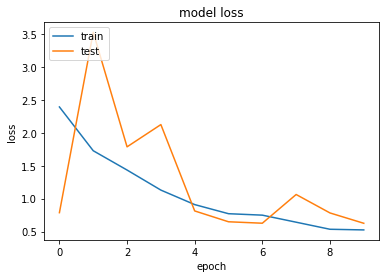

In [ ]:
#plot for model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot for model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **AlexNet Architecture on Horse2Zebra Dataset**

In [ ]:
import os
import zipfile

if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:05<00:00, 23.3MB/s]


In [ ]:
import PIL.Image as Image
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [ ]:
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

#Sort filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

#Save all images
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model2.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
history2 = model2.fit( train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 13s 118ms/step - loss: 2.2872 - acc: 0.5655 - val_loss: 0.7494 - val_acc: 0.4840
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 1.6642 - acc: 0.5890 - val_loss: 0.9828 - val_acc: 0.5030
Epoch 3/10
100/100 [==============================] - 15s 153ms/step - loss: 1.4608 - acc: 0.6020 - val_loss: 0.8439 - val_acc: 0.5400
Epoch 4/10
100/100 [==============================] - 11s 114ms/step - loss: 1.0153 - acc: 0.6460 - val_loss: 1.1603 - val_acc: 0.5220
Epoch 5/10
100/100 [==============================] - 12s 115ms/step - loss: 0.9361 - acc: 0.6635 - val_loss: 0.7709 - val_acc: 0.6010
Epoch 6/10
100/100 [==============================] - 12s 116ms/step - loss: 0.8526 - acc: 0.6820 - val_loss: 0.7581 - val_acc: 0.6070
Epoch 7/10
100/100 [==============================] - 12s 115ms/step - loss: 0.7459 - acc: 0.6910 - val_loss: 0.6927 - val_acc: 0.6140
Epoch 8/10
100/100 [==============================] - 1

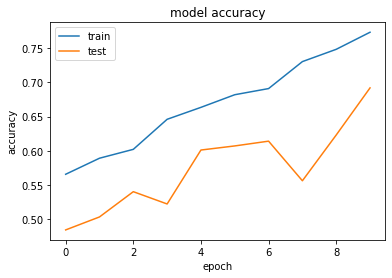

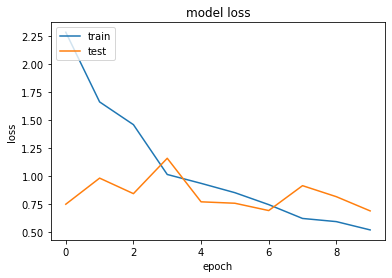

In [ ]:
#plot for model accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot for model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

VGG on cats and dogs

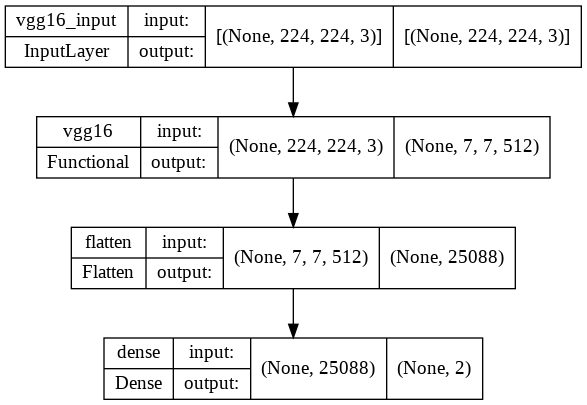

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(vgg,  show_shapes=True, show_layer_names=True)

In [1]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [2]:
import tensorflow as tf
vgg = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
vgg.summary()

vgg.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
history = vgg.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 35s 218ms/step - loss: 0.5065 - acc: 0.7530 - val_loss: 0.3506 - val_acc: 0.8660
Epoch 2/2
100/100 [==============================] - 21s 206ms/step - loss: 0.2953 - acc: 0.8945 - val_loss: 0.2794 - val_acc: 0.9010


GoogleNet on CatsAndDogs

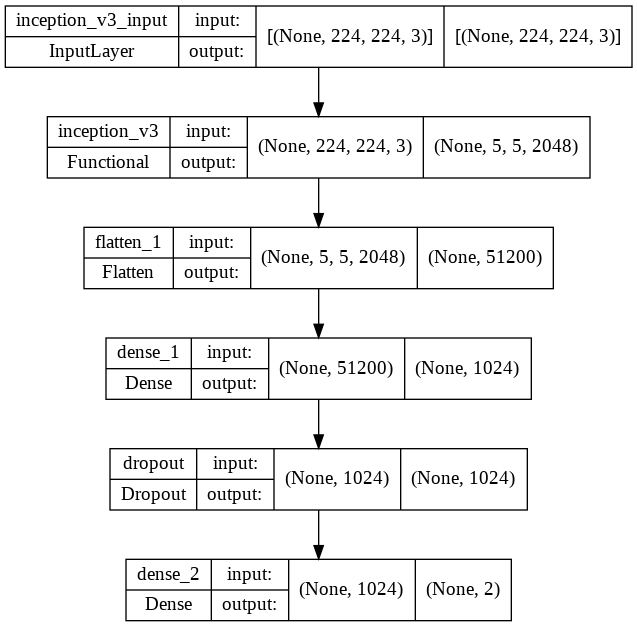

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model5,  show_shapes=True, show_layer_names=True)

In [13]:
train_generator5 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [14]:
validation_generator5 = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
base_model5 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [16]:
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              52429824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 74,234,658
Trainable params: 52,431,874
Non-trainable params: 21,802,784
_________________________________________________________________


In [17]:
history5 = model5.fit(
train_generator5,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator5,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 20s 140ms/step - loss: 0.4706 - acc: 0.9565 - val_loss: 0.2693 - val_acc: 0.9800
Epoch 2/2
100/100 [==============================] - 12s 119ms/step - loss: 0.1450 - acc: 0.9870 - val_loss: 0.2333 - val_acc: 0.9810


ResNet50 on CatsAndDogs

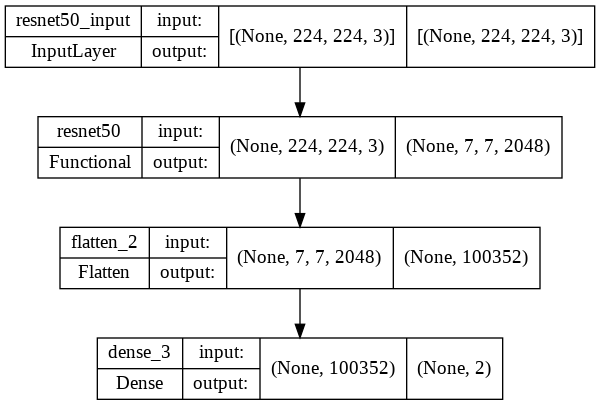

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model4,  show_shapes=True, show_layer_names=True)

In [18]:
train_generator4 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator4 = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
base_model4 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [21]:
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
history4 = model4.fit(
train_generator4,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator4,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 17s 137ms/step - loss: 0.6927 - acc: 0.5740 - val_loss: 0.6359 - val_acc: 0.6450
Epoch 2/2
100/100 [==============================] - 13s 132ms/step - loss: 0.6411 - acc: 0.6305 - val_loss: 0.6715 - val_acc: 0.6010


EfficientNetB0 on Cats and Dogs

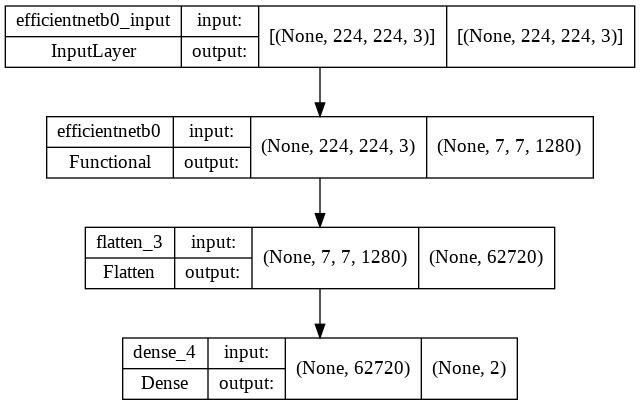

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model2,show_shapes=True,show_layer_names=True)

In [23]:
train_generator2 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [24]:
validation_generator2 = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
base_model2 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [26]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [27]:
history2 = model2.fit(
train_generator2,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=4,
      validation_data=validation_generator2,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/4
100/100 [==============================] - 20s 134ms/step - loss: 0.7367 - acc: 0.5045 - val_loss: 0.7028 - val_acc: 0.5000
Epoch 2/4
100/100 [==============================] - 12s 123ms/step - loss: 0.7116 - acc: 0.5205 - val_loss: 0.7390 - val_acc: 0.5000
Epoch 3/4
100/100 [==============================] - 15s 154ms/step - loss: 0.7301 - acc: 0.5110 - val_loss: 0.7006 - val_acc: 0.5000
Epoch 4/4
100/100 [==============================] - 12s 117ms/step - loss: 0.7424 - acc: 0.4965 - val_loss: 0.7201 - val_acc: 0.5000


MobileNet V2 on CatsandDogs

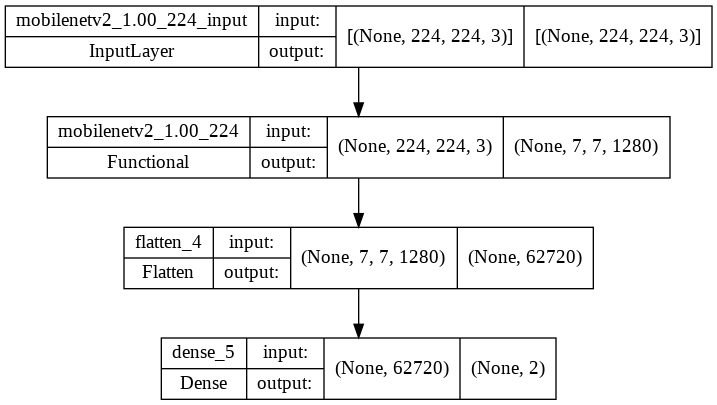

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model3,  show_shapes=True, show_layer_names=True)

In [28]:
train_generator3 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [29]:
validation_generator3 = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
base_model3 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [31]:
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
history3 = model3.fit(
train_generator3,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator3,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 14s 115ms/step - loss: 0.1728 - acc: 0.9550 - val_loss: 0.0832 - val_acc: 0.9730
Epoch 2/2
100/100 [==============================] - 11s 109ms/step - loss: 0.0124 - acc: 0.9960 - val_loss: 0.0646 - val_acc: 0.9760
